<a href="https://colab.research.google.com/github/lynnkuan/ML/blob/main/titanic_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic.csv')
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

x_col_num = ['Age','SibSp','Parch','Fare']
x_col_cat = ['Pclass','Sex','Embarked']
x_cols = x_col_num + x_col_cat
y_col = ['Survived']

x = df[x_cols]
y = df[y_col]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
num_pl = make_pipeline(SimpleImputer(strategy='median'))
cat_pl = make_pipeline(SimpleImputer(strategy='most_frequent'),OneHotEncoder(sparse_output=False))

data_pl = ColumnTransformer([
    ('num_pl',num_pl,x_col_num),
    ('cat_pl',cat_pl,x_col_cat)
])

data_pl.fit_transform(x_train)[:1]

array([[45.5,  0. ,  0. , 28.5,  1. ,  0. ,  0. ,  0. ,  1. ,  0. ,  0. ,
         1. ]])

In [12]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier
model_pl_tree = make_pipeline(data_pl,DecisionTreeClassifier(random_state=42))
model_pl_tree.fit(x_train,y_train)

y_pred_train = model_pl_tree.predict(x_train)
y_pred_test = model_pl_tree.predict(x_test)

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9789325842696629
0.7932960893854749


In [13]:
#解決過擬合問題
model_pl_tree = make_pipeline(data_pl,DecisionTreeClassifier(random_state=42,max_depth=4))
model_pl_tree.fit(x_train,y_train)

print('train accuracy rate:',model_pl_tree.score(x_train,y_train))
print('test accuracy rate:',model_pl_tree.score(x_test,y_test))

train accuracy rate: 0.8398876404494382
test accuracy rate: 0.7988826815642458


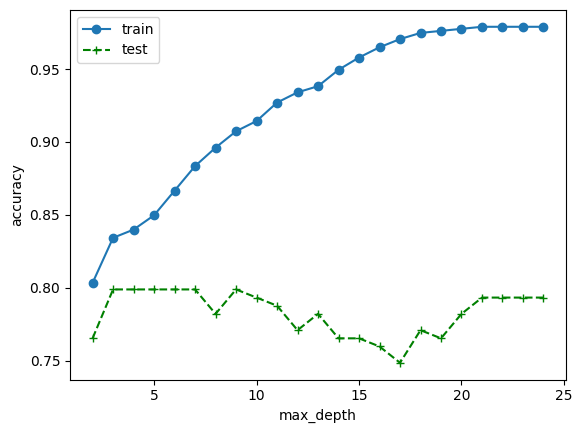

In [17]:
acc_train=[]
acc_test=[]

n_depth = range(2,25)
for n in n_depth:
    model_pl_tree = make_pipeline(data_pl,DecisionTreeClassifier(random_state=42,max_depth=n))
    model_pl_tree.fit(x_train,y_train)

    acc_train.append(model_pl_tree.score(x_train,y_train))
    acc_test.append(model_pl_tree.score(x_test,y_test))

plt.plot(n_depth,acc_train,marker='o',label='train')
plt.plot(n_depth,acc_test,marker='+',c = 'green',ls ='--',label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

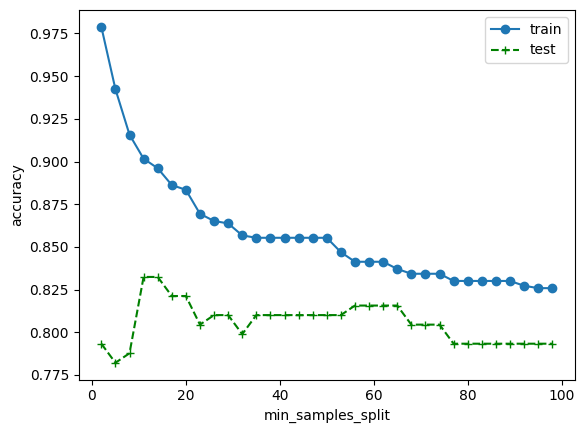

In [18]:
acc_train=[]
acc_test=[]

n_range = range(2,100,3)
for n in n_range:
    model_pl_tree = make_pipeline(data_pl,DecisionTreeClassifier(random_state=42,min_samples_split=n))
    model_pl_tree.fit(x_train,y_train)

    acc_train.append(model_pl_tree.score(x_train,y_train))
    acc_test.append(model_pl_tree.score(x_test,y_test))

plt.plot(n_range,acc_train,marker='o',label='train')
plt.plot(n_range,acc_test,marker='+',c = 'green',ls ='--',label='test')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.legend()

In [20]:
#feature_importances
model_pl_tree = make_pipeline(data_pl,DecisionTreeClassifier(random_state=42,max_depth=4))
model_pl_tree.fit(x_train,y_train)

tree= model_pl_tree.named_steps['decisiontreeclassifier']
feature_importance = tree.feature_importances_
feature_importance

array([0.07641005, 0.04605851, 0.00246182, 0.08106423, 0.03809395,
       0.        , 0.1624037 , 0.57960818, 0.        , 0.        ,
       0.        , 0.01389956])

In [21]:
print(f'numerical:{x_col_num}')
print(f'categorical:{x_col_cat}')

#獨熟編碼後的特徵值
cat_pl = data_pl.named_transformers_['cat_pl']
oh_cols = cat_pl.named_steps['onehotencoder'].get_feature_names_out(x_col_cat)
print(f'onehot:{oh_cols}')

cols = x_col_num + list(oh_cols)
cols

numerical:['Age', 'SibSp', 'Parch', 'Fare']
categorical:['Pclass', 'Sex', 'Embarked']
onehot:['Pclass_1' 'Pclass_2' 'Pclass_3' 'Sex_female' 'Sex_male' 'Embarked_C'
 'Embarked_Q' 'Embarked_S']


['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [23]:
pd.DataFrame(feature_importance,index=cols,columns=['coef']).sort_values(by='coef',ascending=False)

,coef
Sex_female,0.579608
Pclass_3,0.162404
Fare,0.081064
Age,0.076410
SibSp,0.046059
Pclass_1,0.038094
Embarked_S,0.013900
Parch,0.002462
Pclass_2,0.000000
Sex_male,0.000000


In [24]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot

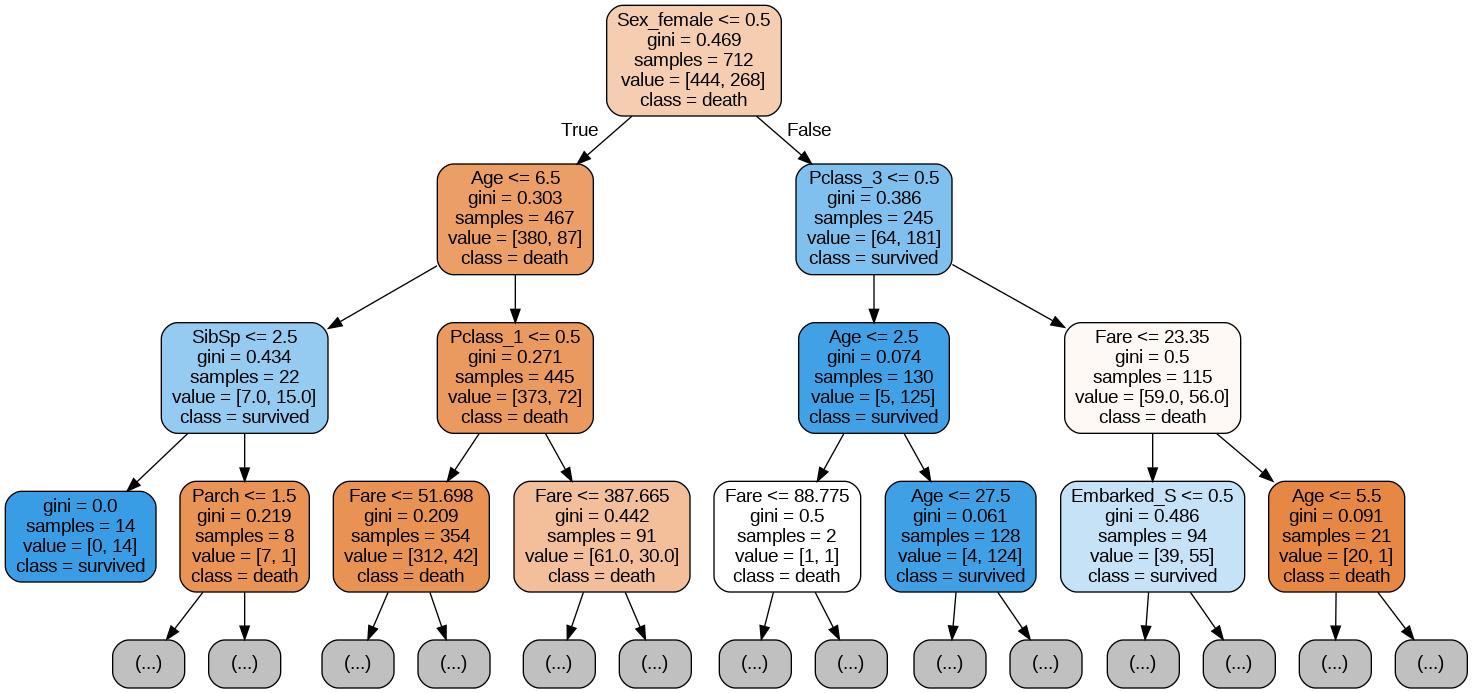

In [27]:
features = cols
class_names = ['death','survived']

dot_data = export_graphviz(model_pl_tree.named_steps['decisiontreeclassifier'],
                         out_file=None,
                         feature_names=features,
                         class_names=class_names,
                         proportion=False,
                         filled=True,
                         rounded=True,
                         max_depth=3)

graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tree.png')
Image('tree.png')